### Ploting Normal PDF

2000


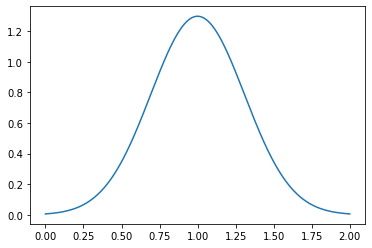

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

# Plot between -10 and 10 with .001 steps.
ts = 2
x_axis = np.arange(0, ts, 0.001)

# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
# print(mean)

# sd = statistics.stdev(x_axis)
sd = ts/6.5

tt = norm.pdf(x_axis, mean, sd) * x_axis
print(len(tt))
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

### Testing the Scipy Integrate Function

In [2]:
import scipy.integrate as integrate
# result = integrate.quad(lambda x: norm.pdf(x, mean, sd), 0, 2)
result = integrate.quad(lambda x: ((1/(sd * np.sqrt(2 * np.pi))) * np.exp(-(x - mean)**2 / (2*sd**2))), 0, 2)
result

(0.998845932501836, 1.9129275190244398e-14)

### My Custom Integration Function (Very Slow)

In [3]:
# dx = ts / 1e6
# print(dx)
# t = []
# for i in range(1, 1000001):
#     t.append(dx * norm.pdf(i * dx, mean, sd))

# print(np.array(t).sum())

### Speed Routine

In [4]:
expedient_number_of_speed_requests = 10
true_number_of_speed_requests = expedient_number_of_speed_requests + 1 # adding 1 because I am appending 0 to the final routine

ti = ts / true_number_of_speed_requests
average_velocity = 0.55

# request_number = 20
requested_speeds = []
for i in range(1, expedient_number_of_speed_requests + 1):
    requested_speeds.append(ti * norm.pdf(i * ti, mean, sd) * average_velocity)
print('req len: ', len(requested_speeds))
individual_requested_speeds = np.array(requested_speeds)

utilized_average_speed = individual_requested_speeds.sum()
# print('utilized avg speed: ', utilized_average_speed)

error = average_velocity - utilized_average_speed
# print('error: ', error)

individual_request_deficit = error / expedient_number_of_speed_requests
# print('individual req deficit: ', individual_request_deficit)

corrected_requested_speeds = individual_requested_speeds + individual_request_deficit
# print('corrected requested avg speed: ', corrected_requested_speeds.sum())

final_speed_routine = list(corrected_requested_speeds)
final_speed_routine.append(0)
# final_speed_routine.insert(0, 0)
print('final_routine: ', final_speed_routine)
print('final_routine_length: ', len(final_speed_routine))
print('final_routine_aggregate: ', np.array(final_speed_routine).sum())

# print(ti * norm.pdf(request_number * ti, mean, sd) * average_velocity)

req len:  10
final_routine:  [0.003945150003512883, 0.015475732802307537, 0.04379592099650406, 0.08781310228993795, 0.1243279585377204, 0.12420877634030915, 0.08756093507086556, 0.04358687139194029, 0.015373062381112928, 0.003912490185789222, 0]
final_routine_length:  11
final_routine_aggregate:  0.5499999999999999


In [5]:
class VelocityDirectionError(Exception('Velocity direction is incorrect')):
    def __init__(self, *args: object) -> None:
        super().__init__(*args)

# np.arccos(0.5) * 180 / np.pi
if not ():
    print('empty tuple')

empty tuple


### Matplotlib Graph Animation

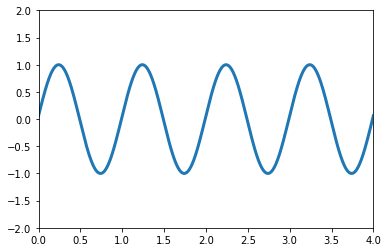

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

# initializing a figure in
# which the graph will be plotted
fig = plt.figure()

# marking the x-axis and y-axis
axis = plt.axes(xlim =(0, 4),
				ylim =(-2, 2))

# initializing a line variable
line, = axis.plot([], [], lw = 3)

# data which the line will
# contain (x, y)
def init():
	line.set_data([], [])
	return line,

def animate(i):
	x = np.linspace(0, 4, 1000)

	# plots a sine graph
	y = np.sin(2 * np.pi * (x - 0.01 * i))
	line.set_data(x, y)
	
	return line,

anim = FuncAnimation(fig, animate, init_func = init,
					frames = 200, interval = 20, blit = True)


anim.save('continuousSineWave.mp4',
		writer = 'ffmpeg', fps = 30)


In [7]:
obstacles = [(16, 10, 4, 5), (0, 35, 10, 7)]
sorted_obstacles = sorted(obstacles, key=lambda  x: x[0])
sorted_obstacles

width = 20
position = 12, 12

holes = []
if sorted_obstacles[0][0] != 0: # add leftmost hole if it exists
    hole_start_position = 0, sorted_obstacles[0][1]
    hole_width = sorted_obstacles[0][0] - 0
    hole_distance_from_self = position[0] - (hole_start_position[0] + hole_width / 2)
    holes.append((hole_start_position, hole_width, hole_distance_from_self))
for obstacle_index in range(len(sorted_obstacles) - 1): # holes in between the obstacles
    hole_start_position = sorted_obstacles[obstacle_index][0] + sorted_obstacles[obstacle_index][2], sorted_obstacles[obstacle_index][1]
    hole_width = sorted_obstacles[obstacle_index + 1][0] - hole_start_position[0]
    hole_distance_from_self = position[0] - (hole_start_position[0] + hole_width / 2)
    holes.append((hole_start_position, hole_width, hole_distance_from_self))
if sorted_obstacles[-1][0] + sorted_obstacles[-1][2] < width: # add rightmost hole if it exists
    hole_start_position = sorted_obstacles[-1][0] + sorted_obstacles[-1][2], sorted_obstacles[-1][1]
    hole_width = width - hole_start_position[0]
    hole_distance_from_self = position[0] - (hole_start_position[0] + hole_width / 2)
    holes.append((hole_start_position, hole_width, hole_distance_from_self))
print(sorted_obstacles)
print(sorted_obstacles[-1][0] + sorted_obstacles[-1][2])
holes

[(0, 35, 10, 7), (16, 10, 4, 5)]
20


[((10, 35), 6, -1.0)]

In [8]:
import config as cf

holes = [((0, 25), 3, 15.5), ((17, 25), 3, -1.5)]

wide_enough_holes = [hole for hole in holes if hole[1] > 2 * (cf.AGENT_RADIUS + cf.OBSTACLE_ALLOWANCE)] # first select holes that the agent can pass freely
sorted_holes = sorted(wide_enough_holes, key=lambda x: np.abs(x[2])) # sort the holes starting from the closest to the agent
best_hole = sorted_holes[0]
best_hole

a = {}
a[(1, 2)] = 7
(1, 2) in a

True

### Date and Time Calculations

In [9]:
from datetime import datetime, timedelta
arrive = (datetime.now() + timedelta(hours=2)).timestamp()
datetime.fromtimestamp(arrive)

datetime.now() - datetime.now()  < timedelta(seconds=5)

True

### Checking if Two Obstacles Overlap Vertically

In [10]:
obstacles = [(4, 1), (3, 2), (10, 0)]
for i in range(len(obstacles) - 1):
    if obstacles[i][0] >= obstacles[i+1][1] and obstacles[i][1] <= obstacles[i+1][0]:
        print(True)
    else:
        print(False)

type(3 - 2)

True
True


int

### Solving Simultaneous Equations

In [32]:
# A = np.array([[2, 1], [1, -3]]) # Matrix Equation Ax = C
# C = np.array([0, -7])
# x = np.linalg.solve(A, C)
# print(x)


# width = 20
# populations = [2, 5, 10]
# y_index = [0, 0 ]

# formations = {
#     population: [(width / (population * 2)) + i for i in range(0, width, int(width/population))] for population in populations
# }

width = 20
agents_population = 12

formation = lambda population, width: [(width / (population * 2)) + i for i in range(0, width, int(width/population))]
formation = formation(agents_population, width) if agents_population <= 10 else  formation(10, width)
mod_step = -2
agents = []
for agent_id in range(agents_population):
    if agent_id % 10 == 0:
        mod_step += 2
    # agent_position = (mod_step, formation[agent_id % 10])
    agents.append({
        'id': agent_id,
        'x': formation[agent_id % 10],
        'y': mod_step,
    })
print(agents)

[{'id': 0, 'x': 1.0, 'y': 0}, {'id': 1, 'x': 3.0, 'y': 0}, {'id': 2, 'x': 5.0, 'y': 0}, {'id': 3, 'x': 7.0, 'y': 0}, {'id': 4, 'x': 9.0, 'y': 0}, {'id': 5, 'x': 11.0, 'y': 0}, {'id': 6, 'x': 13.0, 'y': 0}, {'id': 7, 'x': 15.0, 'y': 0}, {'id': 8, 'x': 17.0, 'y': 0}, {'id': 9, 'x': 19.0, 'y': 0}, {'id': 10, 'x': 1.0, 'y': 2}, {'id': 11, 'x': 3.0, 'y': 2}]


In [38]:
a = {}
a.update({
    'a': 3
})
a['b'] = 2
a

{'a': 3, 'b': 2}